In [1]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [2]:
low_heat_medicago_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Medicago_truncatula/Control/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_medicago_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Medicago_truncatula/Control/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_medicago_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Medicago_truncatula/Control/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


low_heat_medicago= pd.DataFrame(
    data=zip(
        low_heat_medicago_1["Reads"],
        low_heat_medicago_2["Reads"],
        low_heat_medicago_3["Reads"],
    ),
    columns=["medicago Cold Rep 1", "medicago Cold Rep 2" ,"medicago Cold Rep 3",],
    index=low_heat_medicago_1.index,
)


In [3]:
low_heat_medicago

,medicago Cold Rep 1,medicago Cold Rep 2,medicago Cold Rep 3
LOC120575846,0,0,0
LOC120577382,0,0,0
LOC25481844,75,7,5
LOC11432805,49,81,120
LOC11424458,3,0,0
...,...,...,...
A0S16_gp19,5,12,3
A0S16_gp01,313,134,138
A0S16_gt14,0,0,0
A0S16_gt15,0,0,0


In [4]:
high_heat_medicago_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Medicago_truncatula/Long_salt_stem/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_medicago_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Medicago_truncatula/Long_salt_stem/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_medicago_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Medicago_truncatula/Long_salt_stem/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


high_heat_medicago= pd.DataFrame(
    data=zip(
        high_heat_medicago_1["Reads"],
        high_heat_medicago_2["Reads"],
        high_heat_medicago_3["Reads"],
    ),
    columns=["medicago Hot Rep 1", "medicago Hot Rep 2" ,"medicago Hot Rep 3",],
    index=high_heat_medicago_1.index,
)


In [5]:
high_heat_medicago

,medicago Hot Rep 1,medicago Hot Rep 2,medicago Hot Rep 3
LOC120575846,0,0,0
LOC120577382,0,0,0
LOC25481844,113,243,452
LOC11432805,7,34,27
LOC11424458,0,0,5
...,...,...,...
A0S16_gp19,4,12,4
A0S16_gp01,117,128,129
A0S16_gt14,0,0,0
A0S16_gt15,0,0,0


In [6]:
combined_medicago = pd.concat([low_heat_medicago, high_heat_medicago], axis=1)

In [7]:
combined_medicago

,medicago Cold Rep 1,medicago Cold Rep 2,medicago Cold Rep 3,medicago Hot Rep 1,medicago Hot Rep 2,medicago Hot Rep 3
LOC120575846,0,0,0,0,0,0
LOC120577382,0,0,0,0,0,0
LOC25481844,75,7,5,113,243,452
LOC11432805,49,81,120,7,34,27
LOC11424458,3,0,0,0,0,5
...,...,...,...,...,...,...
A0S16_gp19,5,12,3,4,12,4
A0S16_gp01,313,134,138,117,128,129
A0S16_gt14,0,0,0,0,0,0
A0S16_gt15,0,0,0,0,0,0


In [8]:
medicago_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Cold", "Cold", "Cold", "Hot", "Hot", "Hot"],
    index=[
        "medicago Cold Rep 1",
        "medicago Cold Rep 2",
        "medicago Cold Rep 3",
        "medicago Hot Rep 1",
        "medicago Hot Rep 2",
        "medicago Hot Rep 3",
    ],
)

In [9]:
low_heat_potato_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Solanum_tuberosum/Control/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_potato_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Solanum_tuberosum/Control/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_potato_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Solanum_tuberosum/Control/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)



low_heat_potato = pd.DataFrame(
    data=zip(
        low_heat_potato_1["Reads"],
        low_heat_potato_2["Reads"],
        low_heat_potato_3["Reads"],
    ),
    columns=["potato Cold Rep 1", "potato Cold Rep 2", "potato Cold Rep 3",],
    index=low_heat_potato_1.index,
)


In [10]:
#low_heat_potato.index = low_heat_potato.index.str.split('.').str[0].str.upper()+'_' + low_heat_potato.index.str.split('.').str[1]

In [11]:
# low_heat_potato.index = low_heat_potato.index.str.split(':').str[1]
low_heat_potato

,potato Cold Rep 1,potato Cold Rep 2,potato Cold Rep 3
LOC102578245,598,222,171
LOC107059702,0,0,0
LOC107059723,0,0,0
LOC102578572,672,507,750
LOC107059737,0,0,0
...,...,...,...
LK299_pgt044,0,0,0
LK299_pgp004,0,0,0
LK299_pgt045,0,0,0
LK299_pgp003,0,0,0


In [16]:
high_heat_potato_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Solanum_tuberosum/24hr_Salt/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_potato_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Solanum_tuberosum/24hr_Salt/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_potato_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/Solanum_tuberosum/24hr_Salt/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


high_heat_potato = pd.DataFrame(
    data=zip(
        high_heat_potato_rep_1["Reads"],
        high_heat_potato_rep_2["Reads"],
        high_heat_potato_rep_3["Reads"],
    ),
    columns=["potato Hot Rep 1", "potato Hot Rep 2", "potato Hot Rep 3",],
    index=low_heat_potato_1.index,
)

In [17]:
#high_heat_potato.index = high_heat_potato.index.str.split('.').str[0].str.upper()+'_' + high_heat_potato.index.str.split('.').str[1]
high_heat_potato

,potato Hot Rep 1,potato Hot Rep 2,potato Hot Rep 3
LOC102578245,1752,1331,766
LOC107059702,0,0,0
LOC107059723,0,0,0
LOC102578572,119,98,309
LOC107059737,0,0,0
...,...,...,...
LK299_pgt044,0,0,0
LK299_pgp004,0,0,0
LK299_pgt045,0,0,0
LK299_pgp003,0,0,0


In [18]:
combined_potato = pd.concat([high_heat_potato, low_heat_potato], axis=1)

In [19]:
combined_potato = combined_potato.T




In [20]:
combined_medicago = combined_medicago.T

In [21]:
combined_medicago.to_csv("/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/medicago_reads.csv")
combined_potato.to_csv("/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/potato_reads.csv")

In [22]:
potato_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Hot","Cold","Cold", "Cold", ],
    index=[
        "potato Hot Rep 1",
        "potato Hot Rep 2",
        "potato Hot Rep 3",
        "potato Cold Rep 1",
        "potato Cold Rep 2",
        "potato Cold Rep 3",
    ],
)

In [23]:
genes_to_keep_medicago = combined_medicago.columns[combined_medicago.sum(axis=0) >= 100]
combined_medicago = combined_medicago[genes_to_keep_medicago]
inference_medicago = DefaultInference(n_cpus=30)
dds_medicago = DeseqDataSet(
    counts=combined_medicago,
    metadata=medicago_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_medicago,
)
dds_medicago.deseq2()
stat_res_medicago = DeseqStats(dds_medicago, inference=inference_medicago)
stat_res_medicago.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.14 seconds.

Fitting dispersion trend curve...
... done in 0.56 seconds.

Fitting MAP dispersions...
... done in 1.35 seconds.

Fitting LFCs...
... done in 1.08 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                baseMean  log2FoldChange     lfcSE      stat    pvalue  \
LOC25481844   150.734425        3.470699  0.941652  3.685754  0.000228   
LOC11432805    51.736224       -1.813595  0.688594 -2.633764  0.008444   
LOC11423147   403.866867        0.011067  0.505759  0.021882  0.982542   
LOC11434621   127.467076       -0.375968  0.299814 -1.254001  0.209842   
LOC25481846    32.361682        1.724550  0.973774  1.770996  0.076561   
...                  ...             ...       ...       ...       ...   
A0S16_gp24     54.660970        1.155477  0.711024  1.625088  0.104144   
A0S16_gp16     16.930902       -0.927700  0.762576 -1.216534  0.223782   
A0S16_gr02   1677.158374        0.052796  0.560046  0.094271  0.924894   
A0S16_gp07     18.849327       -0.756994  0.670464 -1.129060  0.258873   
A0S16_gp01    153.529985       -0.457645  0.380734 -1.202007  0.229361   

                 padj  
LOC25481844  0.001414  
LOC11432

... done in 0.84 seconds.



In [24]:
genes_to_keep = combined_potato.columns[combined_potato.sum(axis=0) >= 100]
combined_potato = combined_potato[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds = DeseqDataSet(
    counts=combined_potato,
    metadata=potato_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds.deseq2()
stat_res_potato = DeseqStats(dds, inference=inference)
stat_res_potato.summary()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.32 seconds.

Fitting dispersion trend curve...
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 1.54 seconds.

Fitting LFCs...
... done in 1.35 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                baseMean  log2FoldChange     lfcSE      stat        pvalue  \
LOC102578245  824.044875        2.065767  0.533430  3.872610  1.076760e-04   
LOC102578572  396.063317       -1.916998  0.377812 -5.073953  3.896349e-07   
LOC102579565  589.779005       -0.322138  0.151210 -2.130405  3.313818e-02   
LOC102598415  746.107899       -0.331639  0.151165 -2.193886  2.824363e-02   
LOC107060860   66.215139       -1.104732  0.344245 -3.209144  1.331308e-03   
...                  ...             ...       ...       ...           ...   
LK299_pgp015   18.286017       -1.574045  0.693341 -2.270233  2.319344e-02   
LK299_pgp012   41.542570       -2.910014  0.579017 -5.025782  5.013862e-07   
LK299_pgp010  155.554104       -2.001799  0.259749 -7.706656  1.291570e-14   
LK299_pgp009   25.198827       -0.770931  0.706687 -1.090909  2.753129e-01   
LK299_pgp007   28.847392        0.040654  0.609645  0.066685  9.468326e-01   

        

... done in 0.98 seconds.



In [25]:
full_results_potato = stat_res_potato.results_df
full_results_potato
full_results_medicago = stat_res_medicago.results_df

In [26]:
full_results_potato.to_csv('/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/potato_gene_results.csv')
full_results_medicago.to_csv('/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/medicago_gene_results.csv')

/tmp/ipykernel_1647900/3922913482.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=full_results_potato['log2FoldChange'],y=full_results_potato['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")
/tmp/ipykernel_1647900/3922913482.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=up_arabi['log2FoldChange'],y=up_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")


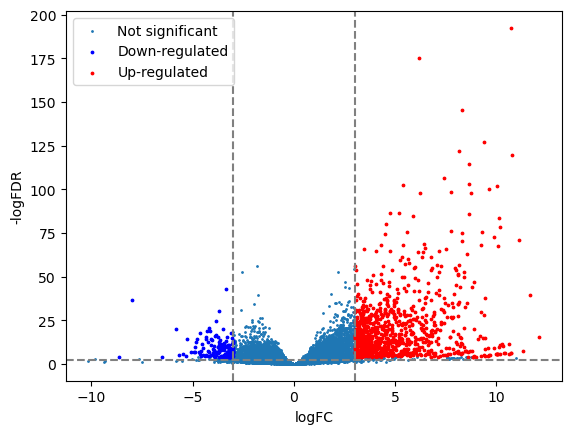

In [27]:
plt.scatter(x=full_results_potato['log2FoldChange'],y=full_results_potato['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down_arabi = full_results_potato[(full_results_potato['log2FoldChange']<=-3)&(full_results_potato['padj']<=0.0001)]
up_arabi = full_results_potato[(full_results_potato['log2FoldChange']>=3)&(full_results_potato['padj']<=0.0001)]

plt.scatter(x=down_arabi['log2FoldChange'],y=down_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up_arabi['log2FoldChange'],y=up_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

In [28]:
up_arabi

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
LOC102591265,3052.753776,5.702669,0.346075,16.478115,5.270302e-61,2.133876e-58
LOC102589696,100.603098,8.217454,1.175361,6.991430,2.720985e-12,4.315567e-11
LOC102596258,214.146407,7.558657,0.670859,11.267127,1.906911e-29,1.478223e-27
LOC102594262,5710.387070,3.129902,0.280687,11.150878,7.090307e-29,5.264737e-27
LOC102591487,124.897526,3.622901,0.545090,6.646425,3.002975e-11,4.068235e-10
...,...,...,...,...,...,...
LOC107059426,110.503920,5.538821,0.770872,7.185135,6.714097e-13,1.148946e-11
LOC107059427,341.191727,5.004216,0.556434,8.993364,2.397771e-19,8.232605e-18
LOC102586384,122.933896,10.405284,1.966276,5.291872,1.210705e-07,8.625670e-07
LOC102590315,113.519213,7.122169,0.851955,8.359793,6.282866e-17,1.730732e-15


In [29]:
up

NameError: name 'up' is not defined

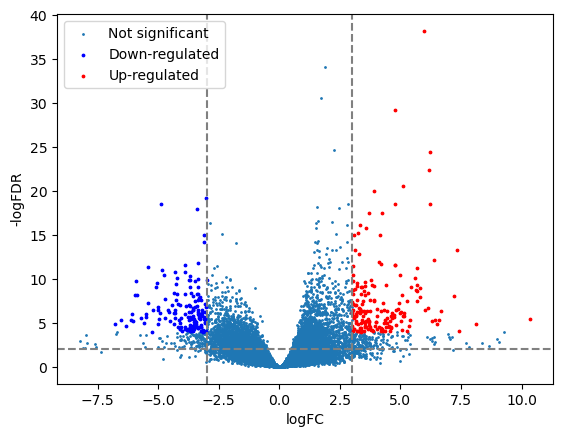

In [30]:
plt.scatter(x=full_results_medicago['log2FoldChange'],y=full_results_medicago['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = full_results_medicago[(full_results_medicago['log2FoldChange']<=-3)&(full_results_medicago['padj']<=0.0001)]
up = full_results_medicago[(full_results_medicago['log2FoldChange']>=3)&(full_results_medicago['padj']<=0.0001)]

plt.scatter(x=down['log2FoldChange'],y=down['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FoldChange'],y=up['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()